# Import packages

In [28]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
!pip install nbconvert


In [6]:
!pip install pandasql


In [7]:
from pandasql import sqldf

In [8]:
pysqldf = lambda q: sqldf(q, globals())

In [9]:
#Reading dataset
df = pd.read_csv('casestudy.csv')
df = df.iloc[:, 1:]
df


,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


In [10]:
#No Missing Values 
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
customer_email,customer_email,0.0
net_revenue,net_revenue,0.0
year,year,0.0


In [11]:
#No duplicate records 
df.duplicated().sum()
duplicate_records = df[df.duplicated()]
duplicate_records

,customer_email,net_revenue,year


In [12]:
#	Total revenue for the current year (2017)
q = """SELECT sum(net_revenue) 
       FROM df 
       where year = 2017;"""

total_revenue = pysqldf(q)
total_revenue
#Total revenue for year 2017 is 31417495.03

,sum(net_revenue)
0,31417495.03


In [13]:
#	New Customer Revenue 
q = """SELECT sum(net_revenue) 
       FROM df 
       where year = 2017 and customer_email not in (select customer_email
       from df
       where year = 2016);"""

new_customer_revenue = pysqldf(q)
new_customer_revenue

,sum(net_revenue)
0,28776235.04


In [14]:
#	Existing Customer Growth 
q = """SELECT sum(net_revenue) as existing_customer_revenue_2017
       FROM df 
       where year = 2017 and customer_email in (select customer_email
       from df
       where year = 2016);"""
q1 ="""SELECT sum(net_revenue) as existing_customer_revenue_2016
       FROM df 
       where year = 2016 and customer_email in (select customer_email
       from df
       where year = 2015);"""
existing_growth_2017 = pysqldf(q) 
existing_growth_2017
existing_growth_2016 = pysqldf(q1) 
existing_growth_2016
growth = existing_growth_2017['existing_customer_revenue_2017'].iloc[0] - existing_growth_2016['existing_customer_revenue_2016']
growth

0   -4844192.59
Name: existing_customer_revenue_2016, dtype: float64

In [15]:
# Revenue lost from attrition
q = """SELECT sum(net_revenue) as revenue_lost_attrition
       FROM df 
       where year = 2016 and customer_email not in (select customer_email
       from df
       where year = 2017);"""

revenue_lost_attrition = pysqldf(q)
revenue_lost_attrition


,revenue_lost_attrition
0,23110294.94


In [16]:
#	Existing Customer Revenue Current Year
q = """SELECT sum(net_revenue) as existing_customer_revenue_2017
       FROM df 
       where year = 2017 and customer_email in (select customer_email
       from df
       where year = 2016);"""

existing_customer_revenue_2017 = pysqldf(q)
existing_customer_revenue_2017

,existing_customer_revenue_2017
0,2641259.99


In [17]:
#	Existing Customer Revenue Prior Year
q = """SELECT sum(net_revenue) as existing_customer_revenue_2016
       FROM df 
       where year = 2016 and customer_email in (select customer_email
       from df
       where year = 2017);"""

existing_customer_revenue_2016 = pysqldf(q)
existing_customer_revenue_2016

,existing_customer_revenue_2016
0,2620648.65


In [18]:
#	Total Customers Current Year
q = """SELECT count(customer_email) as total_2017_customers
       FROM df 
       where year = 2017;"""

total_2017_customers = pysqldf(q)
total_2017_customers

,total_2017_customers
0,249987


In [19]:
# Total Customers Previous Year
q = """SELECT count(customer_email) as total_2016_customers
       FROM df 
       where year = 2016;"""

total_2016_customers = pysqldf(q)
total_2016_customers

,total_2016_customers
0,204646


In [20]:
#	New Customers
q = """SELECT count(customer_email) as new_customers
       FROM df 
       where year = 2017 and customer_email not in (select customer_email
       from df
       where year = 2016);"""

new_customers = pysqldf(q)
new_customers

,new_customers
0,229028


In [21]:
#	Lost Customers
q = """SELECT count(customer_email) as lost_customers
       FROM df 
       where year = 2016 and customer_email not in (select customer_email
       from df
       where year = 2017);"""

lost_customers = pysqldf(q)
lost_customers


,lost_customers
0,183687


# Visualization

# Revenue generated every year 

In [22]:
q = """SELECT sum(net_revenue) as revenue_2015
       FROM df 
       where year = 2015;"""

q1 = """SELECT sum(net_revenue) as revenue_2016
       FROM df 
       where year = 2016;"""

q2 = """SELECT sum(net_revenue) as revenue_2017
       FROM df 
       where year = 2017;"""

revenue_2015 = pysqldf(q)
revenue_2015
revenue_2016 = pysqldf(q1)
revenue_2016
revenue_2017 = pysqldf(q2)
revenue_2017
revenue_all = pd.DataFrame({'revenue': [revenue_2015["revenue_2015"].iloc[0],revenue_2016["revenue_2016"].iloc[0],revenue_2017["revenue_2017"].iloc[0]]},index=['2015', '2016', '2017'])



Text(0.5, 1.0, 'Revenue per year ')

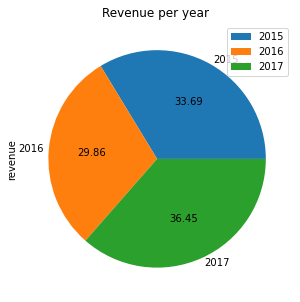

In [23]:
plot = revenue_all.plot.pie(y="revenue", figsize=(20, 5), labeldistance=1.05,autopct='%.2f', labels=revenue_all.index, fontsize=10)
plt.title("Revenue per year ")


# Number of customers every year 

In [24]:
q = """SELECT count(customer_email) as total_count_2015
       FROM df 
       where year = 2015;"""

q1 = """SELECT count(customer_email) as total_count_2016
       FROM df 
       where year = 2016;"""

q2 = """SELECT count(customer_email) as total_count_2017
       FROM df 
       where year = 2017;"""

total_count_2015 = pysqldf(q)
total_count_2015
total_count_2016 = pysqldf(q1)
total_count_2016
total_count_2017 = pysqldf(q2)
total_count_2017
count_all = pd.DataFrame({'lab': ["customer_count_2015","customer_count_2016","customer_count_2017"],"val":[total_count_2015["total_count_2015"].iloc[0],total_count_2016["total_count_2016"].iloc[0],total_count_2017["total_count_2017"].iloc[0]]})

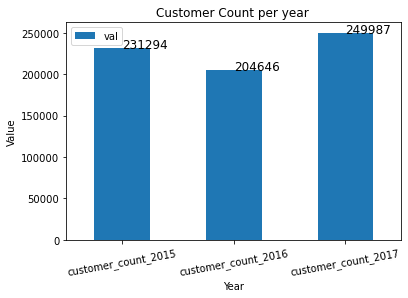

In [25]:
figure = count_all.plot.bar(x='lab', y='val')
plt.xticks(rotation=10, horizontalalignment="center")
plt.title("Customer Count per year ")
plt.xlabel("Year")
plt.ylabel("Value")
label = count_all['val']
for i in range(3):
  plt.text(x=i,y=label[i],s=label[i],size=12,rotation=0,color="black")
plt.show()



# Top 20 customers who generated most revenue 

In [26]:
q = """SELECT customer_email, net_revenue as Customer_revenue
       FROM df 
       group by customer_email order by net_revenue desc limit 20;"""

Customer_revenue = pysqldf(q)
Customer_revenue


,customer_email,Customer_revenue
0,wlykfyvsur@gmail.com,250.00
1,rreoseujpe@gmail.com,250.00
2,qzjxyxqqkf@gmail.com,250.00
3,pucptjgtzp@gmail.com,250.00
4,prjssvocwe@gmail.com,250.00
5,ntbnljudno@gmail.com,250.00
6,jtuwowswih@gmail.com,250.00
7,gitnqxpedq@gmail.com,250.00
8,cdgpolkzog@gmail.com,250.00
9,aeotajdbsn@gmail.com,250.00
